In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import draft 

**Introduction**

In the following section, the improved full-spacetime metric is defined/implemented in the code. Based on: https://arxiv.org/abs/2406.03909. In the following, all quoted equations are taken from this paper, unless another source is given.

**Variables**

The metric equations are depndend on four variables.
1. $M$ which refers to the mass of the BH (Blackhole).
2. $R_s=2MG$ which is the gravitational radius of the BH.
3. $Q_b$ which is a defined  quantitie to modifie the spacetime metric.
4. $Q_c$ which is also a defined  quantitie to modifie the spacetime metric.

In the first section of the code we define all these variables, and in the following sections of the code we define various functions that rely on $Q_b$ and $Q_c$. 

**Background of $Q_b$ and $Q_c$**

$Q_b$ and $Q_c$ are defined trough the following mathematical Form (compare eq. 4.19 - 4.20): 

\begin{align}Q_b&=|\beta_b|\gamma^2L_0^2 \\Q_c&=|\beta_c|\gamma^2L_0^6 \end{align}

where $\beta_b$ and $\beta_c$ are the so called GUP parameters and $\gamma$ is the Barbero-Immirzi parameter.

**Immirzi parameter**

"The Immirzi parameter measures the size of the quantum of area in Planck units." [https://en.wikipedia.org/wiki/Immirzi_parameter]. 

Its value is: 

\begin{align} \gamma=\begin{cases} \frac{\ln(2)}{\sqrt{3}\pi} \\\frac{\ln(3)}{\sqrt{8}\pi}\end{cases} \end{align}

Note: The way of choosing the Immirzi parameter recovers the Bekenstein-Hawking formula. (For more information, see the Wikipedia article linked above)

**GUP paramters $\beta_b$ and $\beta_c$**

The GUP parameters are used to generalise the uncertainty principle. More information can be found either in section 3.1 of https://arxiv.org/abs/2406.03909 or on Wikipedia https://en.wikipedia.org/wiki/Generalized_uncertainty_principle.

In [2]:
# definig variables 
gamma = np.log(2) / (np.sqrt(3) * np.pi)
beta_b, beta_c = 0, 0
L_0 = 5 
M = 1 # Mass of the BH

# definitions to calculate Q_b/c in dependence of beta and L_0 which gives us more possibilitys  to compare the influence of Q_b/c on different eq.
def Q_b (beta_b, L_0):
    return abs(beta_b) * gamma ** 2 * L_0 ** 2

def Q_c (beta_c, L_0):
    return abs(beta_c) * gamma ** 2 * L_0 ** 6

**Improved full spacetime metric**

In the following we will impliment the Improved full spacetime metric tensor in the code using the following equations: 
\begin{align}
f(t)&=\left(1+\frac{Q_b}{r^2}\right)\cdot\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{-\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right) \\
g(t)&=\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\cdot\left(1-\frac{R_s}{\sqrt{r^2+Q_b}}\right)^{-1} \\
h(t)&=r^2\left(1+\frac{Q_c \cdot R_s^2}{4r^8}\right)^{\frac{1}{4}}\\
\text{with: }g&=\text{diag}(-f,g,h, \sin^2(\theta)h)
\end{align}
[Compare eq. 4.25-4.27] 

In [3]:
# defining the functions f, g and h 
def functions(r, param = [beta_b, beta_c, L_0]):
    beta_b, beta_c, L_0 = param
    Q_b_value = Q_b(beta_b, L_0)
    Q_c_value = Q_c(beta_c, L_0)

    R_s = 2 * M

    f = (1 + Q_b_value / r**2) * (1 + Q_c_value * R_s**2 / (4 * r**8))**(-1 / 4) * ( 1 - R_s / np.sqrt(r**2 + Q_b_value))
    g = (1 + Q_c_value * R_s**2 / (4 * r**8))**(1 / 4) * (1 - R_s / np.sqrt(r**2 + Q_b_value))**(-1)
    h = r**2 * (1 + Q_c_value * R_s**2 / (4 * r**8))**(1 / 4)

    return f, g, h

f = lambda r, param: functions(r ,param)[0]
g = lambda r, param: functions(r ,param)[1]
h = lambda r, param: functions(r ,param)[2]

**Implementing class for the use of the methods from the draft document**

In [4]:
BH = draft.BH(f, g, h, [beta_b, beta_c, L_0])

Beta_list=[np.linspace(0, 1, 5), np.linspace(0, 1, 5)]

**Calculating and ploting the Effective potential for different $Q_b$ und $Q_c$**

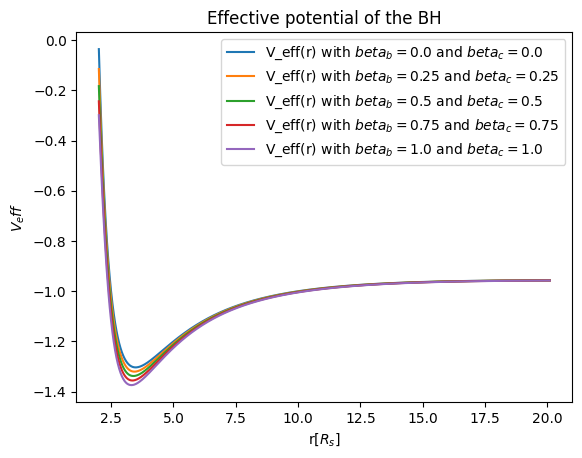

In [5]:
r_list = np.linspace(2 * M + 0.01, (2 * M + 0.01) * 10, 1000) 

V_eff_list = []

for i in range(len(Beta_list[1])):
    BH.set_paramters([Beta_list[0][i], Beta_list[1][i], L_0])
    V_eff_list.append(BH.V_eff(r_list, -1, L_0))

fig, ax = plt.subplots()

for i in range(len(V_eff_list)):
    ax.plot(r_list, V_eff_list[i], label=fr'V_eff(r) with $beta_b = {Beta_list[0][i]}$ and $beta_c = {Beta_list[0][i]}$')  

ax.set_title('Effective potential of the BH') 
ax.set_xlabel('r[$R_s$]')
ax.set_ylabel('$V_eff$') 

ax.legend()

plt.show()

**Solving the equations of motion for a particle (for different $Q_b$ und $Q_c$)**

In [6]:
tau_span = [0, 10]
tau_list = np.linspace(tau_span[0], tau_span[1], 1000)

t_p, r_p, phi_p, x_p, y_p = [], [], [], [], []
t_n, r_n, phi_n, x_n, y_n = [], [], [], [], []

for i in range(len(Beta_list[1])):
    BH.set_paramters([Beta_list[0][i], Beta_list[1][i], L_0])
    sp, sn, f = BH.solve_DAE(tau_list, tau_span, 5.0, sigma = -1, L = L_0, E = 1.2)

    t_p.append(sp[0])
    r_p.append(sp[1])
    phi_p.append(sp[2])

    x_p.append(r_p[i] * np.cos(phi_p[i]))
    y_p.append(r_p[i] * np.sin(phi_p[i]))

    t_n.append(sn[0])
    r_n.append(sn[1])
    phi_n.append(sn[2])

    x_n.append(r_n[i] * np.cos(phi_n[i]))
    y_n.append(r_n[i] * np.sin(phi_n[i]))

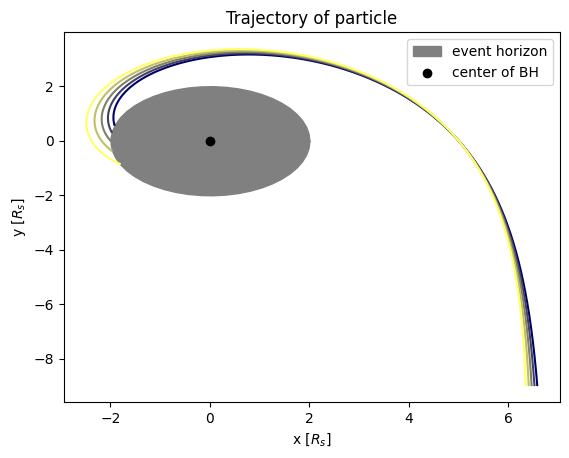

In [7]:
fig, ax = plt.subplots()

Phi_event_horizon = np.linspace(0, 2 * np.pi, 50)
R__event_horizon = [2 * M] * len(Phi_event_horizon)

for i in range(len(x_p)):
    ax.plot(x_p[i], y_p[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4)) # Goal from this point on is to refer to the different Quantum paramters trought different colors. However this conzept is not finished jet
    ax.plot(x_n[i], y_n[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))   

ax.fill_between(R__event_horizon * np.cos(Phi_event_horizon), R__event_horizon * np.sin(Phi_event_horizon), color = 'grey',  label='event horizon' )
ax.scatter(0,0, c = 'black', label='center of BH')


ax.set_title('Trajectory of particle') 
ax.set_xlabel('x [$R_s$]')
ax.set_ylabel('y [$R_s$]') 



ax.legend()

plt.show()

#plt.imshow(Beta_list, aspect='auto', cmap='viridis')
#plt.show()

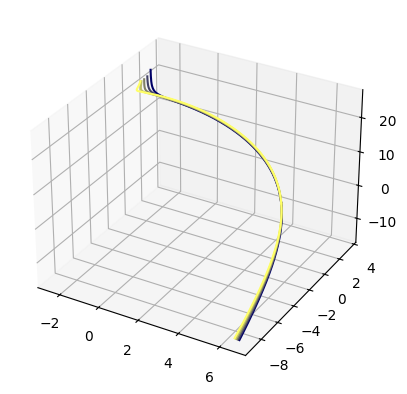

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D surface
for i in range(len(x_p)):
    ax.plot(x_p[i], y_p[i], t_p[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  
    ax.plot(x_n[i], y_n[i], t_n[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  

C:\Users\lukas\AppData\Local\Temp\ipykernel_2704\2486115330.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


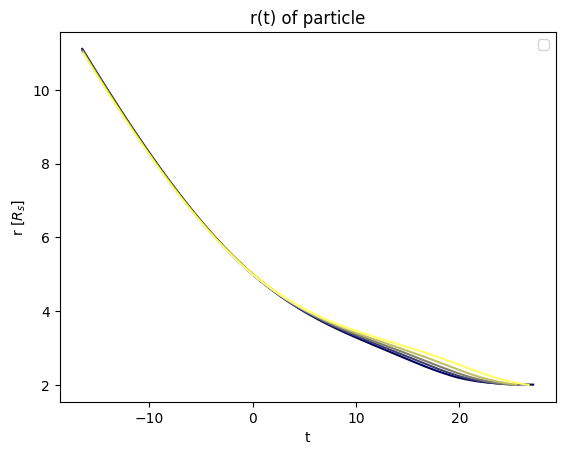

In [9]:
fig, ax = plt.subplots()

for i in range(len(x_p)):
    ax.plot(t_p[i], r_p[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  
    ax.plot(t_n[i], r_n[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  

ax.set_title('r(t) of particle') 
ax.set_xlabel('t')
ax.set_ylabel('r [$R_s$]') 

ax.legend()

plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_2704\2947390513.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()
C:\Users\lukas\AppData\Local\Temp\ipykernel_2704\2947390513.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend()


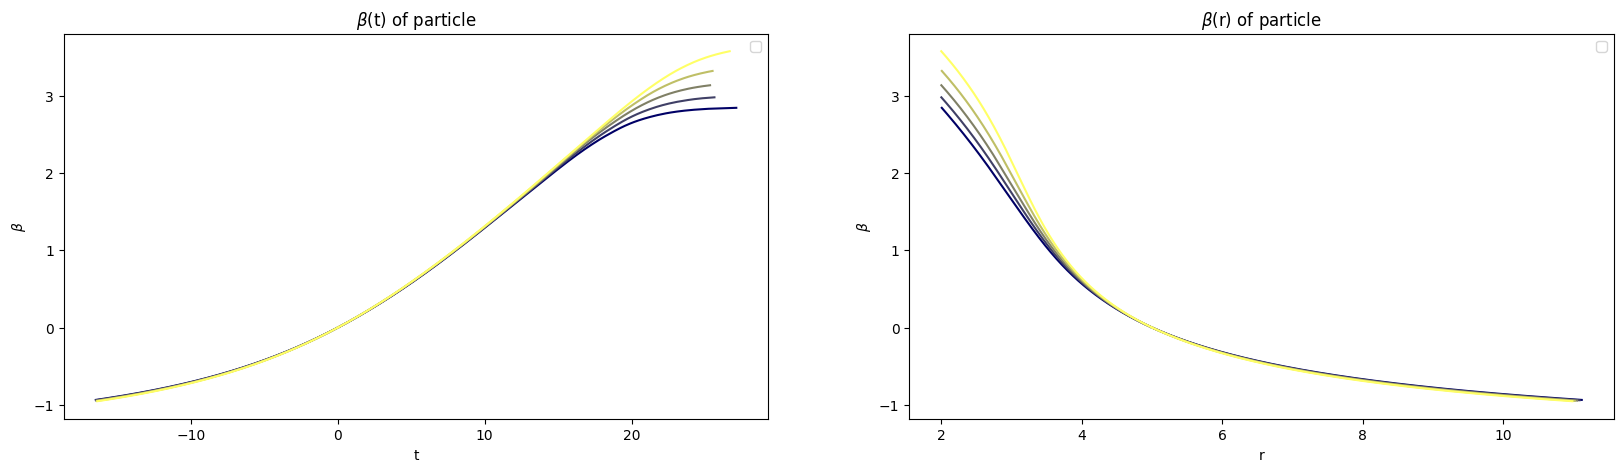

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

for i in range(len(x_p)):
    ax[0].plot(t_p[i], phi_p[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  
    ax[0].plot(t_n[i], phi_n[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  

ax[0].set_title(rf'$\beta$(t) of particle') 
ax[0].set_xlabel('t')
ax[0].set_ylabel(rf'$\beta$') 

ax[0].legend()

for i in range(len(x_p)):
    ax[1].plot(r_p[i], phi_p[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  
    ax[1].plot(r_n[i], phi_n[i], c= (Beta_list[0][i], Beta_list[1][i], 0.4))  

ax[1].set_title(rf'$\beta$(r) of particle') 
ax[1].set_xlabel('r')
ax[1].set_ylabel(rf'$\beta$') 

ax[1].legend()


plt.show()